In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Streaming output truncated to the last 5000 lines.
Epochs:667	step:550	batch_loss:823.4980
Epochs:667	step:600	batch_loss:755.7612
Epoch loss: 500815.16004451446
RMSE on dev data: 9.89427
RMSE on train data: 10.00891
Epochs:668	step:50	batch_loss:769.0082
Epochs:668	step:100	batch_loss:803.0481
Epochs:668	step:150	batch_loss:800.6793
Epochs:668	step:200	batch_loss:789.6467
Epochs:668	step:250	batch_loss:949.5110
Epochs:668	step:300	batch_loss:819.5674
Epochs:668	step:350	batch_loss:793.1839
Epochs:668	step:400	batch_loss:794.9355
Epochs:668	step:450	batch_loss:803.3734
Epochs:668	step:500	batch_loss:746.6901
Epochs:668	step:550	batch_loss:823.3710
Epochs:668	step:600	batch_loss:755.6352
Epoch loss: 500734.3257612395
RMSE on dev data: 9.89425
RMSE on train data: 10.00889
Epochs:669	step:50	batch_loss:768.8804
Epochs:669	step:100	batch_loss:802.9216
Epochs:669	step:150	batch_loss:800.5541
Epochs:669	step:200	batch_loss:789.5206
Epochs:669	step:250	batch_loss:949.3821
Epochs:669	step:300	

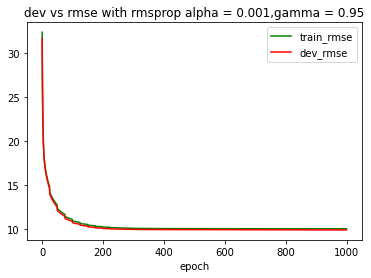

In [ ]:
  from audioop import bias
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math

# The seed will be fixed to 42 for this assignment.
np.random.seed(35)

NUM_FEATS = 90


class Net(object):
    '''
    '''

    def __init__(self, num_layers, hidden_size):
        '''
        Initialize the neural network.
        Create weights and biases.

        Here, we have provided an example structure for the weights and biases.
        It is a list of weight and bias matrices, in which, the
        dimensions of weights and biases are (assuming 1 input layer, 2 hidden layers, and 1 output layer):
        weights: [(NUM_FEATS, num_units), (num_units, num_units), (num_units, num_units), (num_units, 1)]
        biases: [(num_units, 1), (num_units, 1), (num_units, 1), (num_units, 1)]

        Please note that this is just an example.
        You are free to modify or entirely ignore this initialization as per your need.
        Also you can add more state-tracking variables that might be useful to compute
        the gradients efficiently.


        Parameters
        ----------
                num_layers : Number of HIDDEN layers.
                num_units : Number of units in each Hidden layer.
        '''
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.a_states = []
        self.h_states = []
        self.weights = [np.random.randn(y, x) for x, y in zip(
            hidden_size[:-1], hidden_size[1:])]
        self.biases = [np.random.randn(y, 1) for y in hidden_size[1:]]

        # for w in self.biases:
        # 	print(w.shape)
        # self.biases = []
        # self.weights = []
        # for i in range(self.num_layers - 1):
        # 	if i==0:
        # 		# Input layer
        # 		self.weights.append(np.random.uniform(-1, 1, size=(NUM_FEATS, self.hidden_size[i])))
        # 	else:
        # 		# Hidden layer
        # 		self.weights.append(np.random.uniform(-1, 1, size=(self.hidden_size[i], self.hidden_size[i+1])))

        # 	self.biases.append(np.random.uniform(-1, 1, size=(self.hidden_size[i], 1)))

        # Output layer
        # self.biases.append(np.random.uniform(-1, 1, size=(1, 1)))
        # self.weights.append(np.random.uniform(-1, 1, size=(self.hidden_size[-1], 1)))

    def relu(self, X):
        return np.maximum(0, X)

    def d_relu(self, h):
        return (h > 0) * 1

    def d_loss(self, y_hat, y):
        return y_hat - y

    def __call__(self, X):
        '''
        Forward propagate the input X through the network,
        and return the output.

        Note that for a classification task, the output layer should
        be a softmax layer. So perform the computations accordingly

        Parameters
        ----------
                X : Input to the network, numpy array of shape m x d
        Returns
        ----------
                y : Output of the network, numpy array of shape m x 1
        '''
        self.a_states = []
        self.h_states = []
        out = X
        self.a_states.append(X)
        # self.h_states.append(X)
        # print(self.num_layers)
        h = 0
        count = 0
        for i in range(self.num_layers):
            # print(f'weights = {self.weights[i].shape}  biases = {self.biases[i].shape}')
            h = np.dot(out, self.weights[i].T) + self.biases[i].T
            # print("in loop h:", self.weights[i].T.shape)
            out = self.relu(h)
            self.a_states.append(out)
            self.h_states.append(h)
            count += 1
        # print("count", count)
        # h = np.dot(out, self.weights[-1]) + self.biases[-1].T
        # print("H_shape:", h.shape)
        return h

    def backward(self, X, y, y_hat, lamda):
        '''
        Compute and return gradients loss with respect to weights and biases.
        (dL/dW and dL/db)

        Parameters
        ----------
                X : Input to the network, numpy array of shape m x d
                y : Output of the network, numpy array of shape m x 1
                lamda : Regularization parameter.

        Returns
        ----------
                del_W : derivative of loss w.r.t. all weight values (a list of matrices).
                del_b : derivative of loss w.r.t. all bias values (a list of vectors).

        Hint: You need to do a forward pass before performing backward pass.
        '''
        # d_W and d_b saves the accumulated gradients
        d_W = [np.zeros(w.shape) for w in self.weights]
        d_b = [np.zeros(b.shape) for b in self.biases]
        # derivative = self.d_loss(y_hat, y)
        # y = y.values
        for i, (xi, yi) in enumerate(zip(X, y)):
            # print(y_hat[i][0],yi)
            # print("backward",y_hat[i].shape, yi)
            derivative = (self.d_loss(y_hat[i], yi)).reshape(1, 1)
            # print(i)
            del_W = [np.zeros(w.shape) for w in self.weights]
            del_b = [np.zeros(b.shape) for b in self.biases]

            del_b[-1] = derivative
            del_W[-1] = np.dot(self.a_states[-2][i].reshape(-1, 1), derivative).T
            # print("delw shape:", del_W[-1].shape)
            for j in range(2, self.num_layers + 1):
                h = self.h_states[-j][i]
                relu_dash = self.d_relu(h)
                # print(relu_dash.shape, derivative.shape, self.weights[-j+1].shape)
                derivative = np.dot(self.weights[-j + 1].T, derivative) * relu_dash.reshape(-1, 1)
                del_b[-j] = derivative
                # print(j, self.a_states[-4])
                del_W[-j] = np.dot(derivative, self.a_states[-j - 1][i].reshape(1, -1))
                # print("delw shape:", j, del_W[-j].shape)

            d_W = [dw + delw for dw, delw in zip(d_W, del_W)]
            d_b = [db + delb for db, delb in zip(d_b, del_b)]
            d_W = [(dw + 2 * lamda * w) / X.shape[0] for w, dw in zip(self.weights, d_W)]
            d_b = [(db + 2 * lamda * b) / X.shape[0] for b, db in zip(self.biases, d_b)]
            # instead of accumulating, can create a list of all derivative of weights
        return d_W, d_b


class Optimizer(object):
    '''
    '''

    def __init__(self, learning_rate, net, gamma=0.0, alpha=1):
        '''
        Create a Gradient Descent based optimizer with given
        learning rate.

        Other parameters can also be passed to create different types of
        optimizers.

        Hint: You can use the class members to track various states of the
        optimizer.
        '''
        self.gamma = gamma
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.weight_state = [np.zeros(w.shape) for w in net.weights]
        self.bias_state = [np.zeros(b.shape) for b in net.biases]

    def step(self, weights, biases, delta_weights, delta_biases, lamda, t, epoch):
        '''
        Parameters
        ----------
                weights: Current weights of the network.
                biases: Current biases of the network.
                delta_weights: Gradients of weights with respect to loss.
                delta_biases: Gradients of biases with respect to loss.
                To do: RMS prop, momentum, ADAM,adagrad, adaboost
        '''
        # right now this function receives sum of all gradients
        eps = 1e-9
        # right now this function receives sum of all gradients
        # self.weight_state = [self.gamma * sw + (1 - self.gamma) * (dw ** 2) for sw, dw in
        #                      zip(self.weight_state, delta_weights)]
        # self.bias_state = [self.gamma * b + (1 - self.gamma) * (db ** 2) for b, db in
        #                    zip(self.bias_state, delta_biases)]
        weights = [w -
                   self.learning_rate * dw for w, dw in
                   zip(weights, delta_weights)]
        biases = [b -
                  self.learning_rate * db for b, db in
                  zip(biases, delta_biases)]
        # weights = [w-lamda/t * w for w in weights]
        # if epoch % 25 == 0:
        #     self.learning_rate *= 0.95
        '''weights = [(1 - self.learning_rate * lamda) * w -
                   self.learning_rate * dw for w, dw in zip(weights, delta_weights)]
        biases = [(1 - self.learning_rate * lamda) * b -
                  self.learning_rate * db for b, db in zip(biases, delta_biases)]
        return weights, biases'''
        return weights, biases


def loss_mse(y, y_hat):
    '''
    Compute Mean Squared Error (MSE) loss between ground-truth and predicted values.

    Parameters
    ----------
            y : targets, numpy array of shape m x 1
            y_hat : predictions, numpy array of shape m x 1

    Returns
    ----------
            MSE loss between y and y_hat.
    '''
    return np.mean((y_hat - y) ** 2)


def loss_regularization(weights, biases):
    '''
    Compute l2 regularization loss.

    Parameters
    ----------
            weights and biases of the network.

    Returns
    ----------
            l2 regularization loss
    '''
    sum = 0
    for w in weights:
        sum += np.sum(w ** 2)
    for b in biases:
        sum += np.sum(b ** 2)
    # print(f'Sum = {sum}')
    return sum


def loss_fn(y, y_hat, weights, biases, lamda):
    '''
    Compute loss =  loss_mse(..) + lamda * loss_regularization(..)

    Parameters
    ----------
            y : targets, numpy array of shape m x 1
            y_hat : predictions, numpy array of shape m x 1
            weights and biases of the network
            lamda: Regularization parameter

    Returns
    ----------
            l2 regularization loss
    '''
    # print(loss_mse(y, y_hat))
    return loss_mse(y, y_hat) + lamda * loss_regularization(weights, biases)


def rmse(y, y_hat):
    '''
    Compute Root Mean Squared Error (RMSE) loss between ground-truth and predicted values.

    Parameters
    ----------
            y : targets, numpy array of shape m x 1
            y_hat : predictions, numpy array of shape m x 1

    Returns
    ----------
            RMSE between y and y_hat.
    '''
    rmse_loss = np.sqrt(loss_mse(y, y_hat))
    return rmse_loss


def cross_entropy_loss(y, y_hat):
    '''
    Compute cross entropy loss

    Parameters
    ----------
            y : targets, numpy array of shape m x 1
            y_hat : predictions, numpy array of shape m x 1

    Returns
    ----------
            cross entropy loss
    '''
    raise NotImplementedError


def train(
        net, optimizer, lamda, batch_size, max_epochs,
        train_input, train_target,
        dev_input, dev_target
):
    '''
        In this function, you will perform following steps:
            1. Run gradient descent algorithm for `max_epochs` epochs.
            2. For each bach of the training data
                1.1 Compute gradients
                1.2 Update weights and biases using step() of optimizer.
            3. Compute RMSE on dev data after running `max_epochs` epochs.

        Here we have added the code to loop over batches and perform backward pass
        for each batch in the loop.
        For this code also, you are free to heavily modify it.
        '''
    m = train_input.shape[0]
    history_dev_rmse = []
    history_epoch = []
    history_train_rmse = []
    tolerance = 0
    for e in range(max_epochs):
        epoch_loss = 0.
        step = 1
        history_epoch.append(e)
        for i in range(0, m, batch_size):
            # print("Step=", i)
            batch_input = train_input[i:i + batch_size]
            # print("shape", batch_input.shape)
            batch_target = train_target[i:i + batch_size]
            # print("shape", batch_target.shape)
            pred = net(batch_input)
            # print("Pred_shape", pred.shape)
            # batch_target = batch_target.reshape(-1,1)
            # print(pred.shape)
            # print(batch_target.shape)
            # Compute gradients of loss w.r.t. weights and biases
            dW, db = net.backward(batch_input, batch_target, pred, lamda)
            # print('backweights',dW)
            # print('backbiases',db)

            # Get updated weights based on current weights and gradients
            weights_updated, biases_updated = optimizer.step(
                net.weights, net.biases, dW, db, lamda, batch_size, e + 1)

            # Update model's weights and biases
            net.weights = weights_updated
            net.biases = biases_updated
            # print('weights',np.array(net.weights))
            # print('biases',np.array(net.biases))

            # Compute loss for the batch
            batch_loss = loss_fn(batch_target, pred,
                                 net.weights, net.biases, lamda)
            epoch_loss += batch_loss

            if step % 50 == 0:
                # print(e,step,batch_loss.value)
                print(f'Epochs:{e + 1}\tstep:{step}\tbatch_loss:{batch_loss:.4f}')
                # print('Epochs: '+e+' Step: '+step+' batch_loss: '+batch_loss)

            step += 1
        print(f'Epoch loss: {epoch_loss}')
        if (e + 1) % 25 == 0:
            optimizer.learning_rate *= 0.9

        # Write any early stopping conditions required (only for Part 2)
        # Hint: You can also compute dev_rmse here and use it in the early
        # 		stopping condition.

        # After running `max_epochs` (for Part 1) epochs OR early stopping (for Part 2), compute the RMSE on dev data.
        dev_pred = net(dev_input)
        train_pred = net(train_input)

        dev_rmse = rmse(dev_target.reshape(-1, 1), dev_pred)
        # print(train_target.shape)
        train_rmse = rmse(train_target.reshape(-1, 1), train_pred)
        history_train_rmse.append(train_rmse)
        history_dev_rmse.append(dev_rmse)

        print('RMSE on dev data: {:.5f}'.format(dev_rmse))
        print('RMSE on train data: {:.5f}'.format(train_rmse))
        if len(history_dev_rmse) > 1 and history_dev_rmse[e] > history_dev_rmse[e - 1]:
            tolerance += 1
        else:
            tolerance = 0
        if tolerance > 4:
            break
    # print('len of train',len(history_train_rmse))
    # print('len of train',len(history_dev_rmse))
    xpoint = np.array(history_epoch)
    ypoint = np.array(history_train_rmse)
    plt.xlabel("epoch")
    zpoint = np.array(history_dev_rmse)
    plt.title(f'dev vs rmse with rmsprop alpha = {optimizer.alpha},gamma = {optimizer.gamma}')
    plt.plot(xpoint, ypoint, color='g', label='train_rmse')
    plt.plot(xpoint, zpoint, color='r', label='dev_rmse')
    plt.legend()
    plt.show()


def get_test_data_predictions(net, inputs, target):
    '''
    Perform forward pass on test data and get the final predictions that can
    be submitted on Kaggle.
    Write the final predictions to the part2.csv file.

    Parameters
    ----------
        net : trained neural network
        inputs : test input, numpy array of shape m x d

    Returns
    ----------
        predictions (optional): Predictions obtained from forward pass
                                on test data, numpy array of shape m x 1
    '''
    pred = net(inputs)
    # pred = (pred * (2011 - 1922)) + 1922
    # target = (target * (2011 - 1922)) + 1922
    # print(np.max(pred), np.min(pred))
    history_prediction = []
    history_target = []
    history_count = []
    correct_pred = 0
    wrong_pred = 0
    f = open('22d0367_1050.csv', "w", newline='')
    writer = csv.writer(f)
    init_list = ["Id", "Predictions"]
    writer.writerow(init_list)
    for i, p in enumerate(pred):
        write_list = [i + 1, p[0]]
        writer.writerow(write_list)
        history_prediction.append(p)
        # history_target.append(t)
        # history_count.append(i)
        # if abs(int(float(p[0])) - int(t)) < 6:
        #     correct_pred = correct_pred + 1
        # else:
        #     wrong_pred = wrong_pred + 1

        # if i > 100:
        # break
    f.close()
    # accuracy = (correct_pred / (correct_pred + wrong_pred)) * 100
    # print('accuracy', accuracy)
    # xpoint = np.array(history_count)
    # ypoint = np.array(history_prediction)
    # zpoint = np.array(history_target)
    # plt.plot(xpoint, ypoint, color='g', label='pred')
    # plt.plot(xpoint, zpoint, color='r', label='target')
    # plt.legend()
    # plt.show()


def min_max_scaler(x):
    # x_min = np.min(x, axis=0)
    # x_max = np.max(x, axis=0)
    # x = np.divide((x - x_min), (x_max - x_min))
    x_mean = np.mean(x, axis=0)
    x_var = np.var(x, axis=0)
    x = (x - x_mean) / x_var
    return x

def read_data():
    '''
    Read the train, dev, and test datasets
    '''
    TRAIN_FILE = "/content/drive/MyDrive/data/train_selected_features.csv"
    DEV_FILE = "/content/drive/MyDrive/data/dev_selected_features.csv"
    TEST_FILE = "/content/drive/MyDrive/data/test_selected_features.csv"
    TEST_FILE2 = "/content/drive/MyDrive/data/test2.csv"
    train_df = pd.read_csv(TRAIN_FILE)
    test_df = pd.read_csv(TEST_FILE)
    test_df2 = pd.read_csv(TEST_FILE2)
    dev_df = pd.read_csv(DEV_FILE)

    temp = train_df.to_numpy()
    np.random.shuffle(temp)
    train_input = min_max_scaler(temp[:, 1:])
    # train_input = min_max_scaler(train_df.iloc[:, 1:])
    # train_target = min_max_scaler(train_df[train_df.columns[0]])
    # train_target = np.divide((train_df.iloc[:, :1] - 1922), (2011 - 1922))
    train_target = temp[:, 0]
    dev_input = min_max_scaler(dev_df.to_numpy()[:, 1:])
    # dev_input = min_max_scaler(dev_df.iloc[:, 1:])
    # dev_target = min_max_scaler(dev_df[dev_df.columns[0]])
    # dev_target = np.divide((dev_df.iloc[:, 1] - 1922), (2011 - 1922))
    dev_target = dev_df.to_numpy()[:, 0]
    # test_input = min_max_scaler(test_df.to_numpy())
    # test_input = min_max_scaler(test_df.iloc[:, :])
    # dev_target = dev_df[dev_df.columns[0]]
    test_input = min_max_scaler(test_df.to_numpy())
    test_input2 = min_max_scaler(test_df2.to_numpy())
    # print(train_input.shape)
    # print(train_target.shape)
    # print(train_input.shape,train_target.shape)
    return train_input, train_target, dev_input, dev_target, test_input, test_input2

def main():
    # Hyper-parameters
    max_epochs = 1000
    batch_size = 64
    learning_rate = 0.0003
    num_layers = 3
    hidden_size = [67, 34, 17, 1]
    lamda = 1  # Regularization Parameter
    gamma = 0.95
    alpha = 0.001

    train_input, train_target, dev_input, dev_target, test_input, test_input2 = read_data()
    # train_input = np.load("/content/drive/My Drive/SEM1/foundations of ML/ml_project/PCA Train Dataset_50.npy").T
    # dev_input = np.load("/content/drive/My Drive/SEM1/foundations of ML/ml_project/PCA Dev Dataset_50.npy").T
    # test_input = np.load("/content/drive/My Drive/SEM1/foundations of ML/ml_project/PCA Test Dataset_50.npy").T


    net = Net(num_layers, hidden_size)
    optimizer = Optimizer(learning_rate, net, gamma, alpha)
    train(
        net, optimizer, lamda, batch_size, max_epochs,
        train_input, train_target,
        dev_input, dev_target
    )
    get_test_data_predictions(net, test_input, dev_target)
    # print(dev_target)

if __name__ == '__main__':
    main()